In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64  # number of trajectories (batch size)
N = 100  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [4]:
model.load_model("models/100DCallOption.pth")

In [87]:
n_iter = 5 * 10**3
lr = 1e-7

In [101]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


In [102]:
Y_pred = Y_pred * 100

In [19]:
graph = model.iteration, model.training_loss

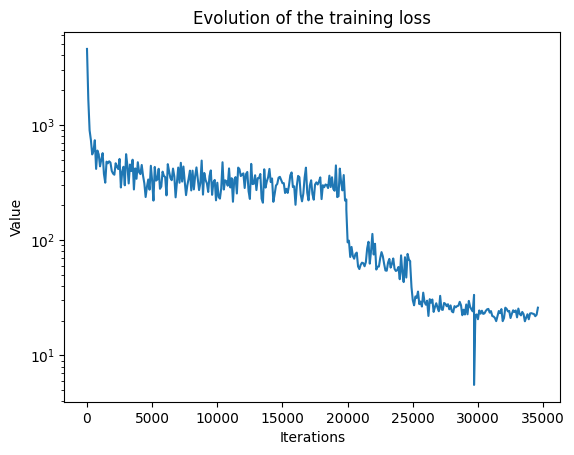

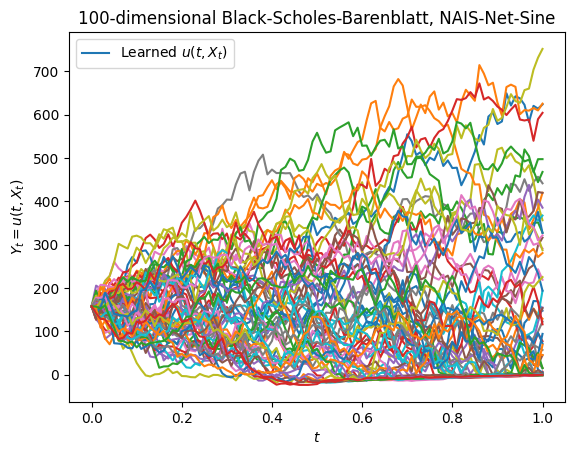

In [103]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T)

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [104]:
Y_pred.shape

(4096, 101, 1)

In [105]:
Y_preds = Y_pred.reshape(4096, 101)

In [106]:
time_stamps = t_test[0].reshape(101,)
time_stamps

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ], dtype=float32)

In [107]:
Y_preds[:,0][:,None]

array([[158.1237],
       [158.1237],
       [158.1237],
       ...,
       [158.1237],
       [158.1237],
       [158.1237]], dtype=float32)

In [108]:
Y_preds

array([[158.1237    , 131.18773   , 128.65077   , ..., 170.14648   ,
        169.49146   , 147.86661   ],
       [158.1237    , 161.15155   , 131.24902   , ..., 152.63354   ,
        139.12828   , 129.09224   ],
       [158.1237    , 162.76492   , 155.21461   , ...,  -0.95656514,
         -0.8619547 ,  -0.7564366 ],
       ...,
       [158.1237    , 129.16115   , 126.582214  , ...,  15.433889  ,
         17.779224  ,  11.431349  ],
       [158.1237    , 138.69112   , 123.275444  , ...,  -2.0302236 ,
         -1.3631582 ,  -1.0945201 ],
       [158.1237    , 149.67557   , 156.94348   , ...,  51.215027  ,
         20.960897  ,   5.079836  ]], dtype=float32)

In [109]:
r = 0.01

In [110]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([158.12491, 158.00261, 158.5675 , 158.5053 , 158.31157, 158.0765 ,
       157.86954, 157.99141, 158.1096 , 158.05449, 158.06543, 158.27238,
       157.91986, 158.00987, 158.01451, 158.47803, 157.72359, 157.58344,
       158.16441, 158.14937, 157.87582, 157.90005, 158.05972, 158.25256,
       158.064  , 158.06459, 157.5394 , 157.78366, 158.04715, 158.11006,
       158.13593, 157.995  , 158.52406, 158.35083, 158.21634, 157.9478 ,
       157.73077, 157.44363, 157.63507, 157.91312, 158.0923 , 158.1823 ,
       158.25067, 158.11626, 157.80241, 157.95282, 157.84196, 157.12486,
       157.46811, 156.83131, 156.56642, 156.9905 , 156.60399, 156.71011,
       156.9282 , 156.96835, 157.40508, 157.62675, 157.47874, 157.52238,
       157.46008, 157.69942, 157.97939, 158.30553, 157.98137, 157.64607,
       157.48778, 157.1865 , 157.28174, 156.94566, 156.74431, 156.93846,
       157.4777 , 157.40614, 157.29779, 156.90866, 157.15916, 157.08745,
       157.37785, 157.37918, 157.42159, 157.56125, 

In [111]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.32100133e-03, -2.51204195e-03,
       -9.43640433e-03, -1.74044166e-02, -2.33651344e-02, -2.50801817e-02,
       -2.92997789e-02, -4.03146818e-02, -5.86261488e-02, -8.72625560e-02,
       -1.06114767e-01, -1.15082636e-01, -1.46322966e-01, -1.72855183e-01,
       -2.14854479e-01, -2.69668669e-01, -3.26977551e-01, -3.75474840e-01,
       -4.16268021e-01, -4.78803754e-01, -5.09942114e-01, -5.99265099e-01,
       -6.85885370e-01, -7.15297103e-01, -7.60880768e-01, -8.41138601e-01,
       -9.25924301e-01, -1.02450788e+00, -1.07330167e+00, -1.13621151e+00,
       -1.20273805e+00, -1.29236114e+00, -1.38848782e+00, -1.40701711e+00,
       -1.45150411e+00, -1.52256620e+00, -1.62263441e+00, -1.66902971e+00,
       -1.71968639e+00, -1.75954771e+00, -1.81169438e+00, -1.85597157e+00,
       -1.89827871e+00, -

In [63]:
from scipy.stats import multivariate_normal as normal
dw_sample = normal.rvs(size=[40000, D, N]) * np.sqrt(T/N)
x_sample = np.zeros([40000, D, N + 1]) 
x_sample[:, :, 0] = np.ones([40000, D]) * 100
factor = np.exp((0.01-(0.25**2)/2)*(T/N))
for i in range(N):   
    x_sample[:, :, i + 1] = (factor * np.exp(0.25 * dw_sample[:, :, i])) * x_sample[:, :, i]

In [64]:
portfolio = np.sum(x_sample, axis=1, keepdims=True)
payoff = np.maximum(portfolio - 100 * 100, 0)
average = np.mean(payoff, axis=0, keepdims=True)
mc_price = np.exp(-0.01 * 1) * average[:, :, 100]

In [65]:
mc_price

array([[157.42728073]])

In [66]:
epe_exact = np.array([mc_price[0][0] for _ in time_stamps])
ene_exact = np.array([0.0 for _ in time_stamps])

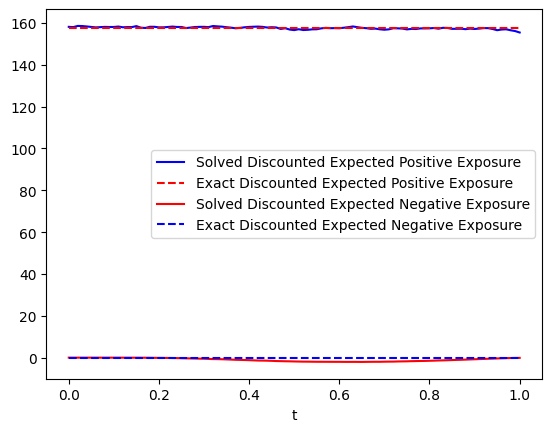

In [112]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,epe_exact,'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,ene_exact,'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [113]:
np.mean((epe_exact - epe)**2 / epe_exact ** 2) 

1.4093882956818944e-05

In [114]:
var = np.abs(np.quantile((Y_preds - Y_preds[:,0][:,None]), 0.05, axis=0))

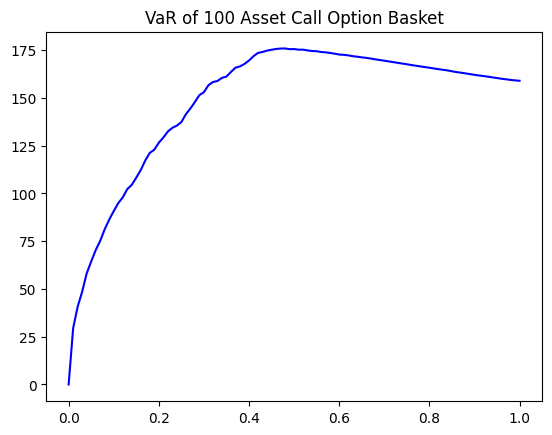

In [115]:
plt.title('VaR of 100 Asset Call Option Basket')
plt.plot(time_stamps,var,'b',label='VaR')
plt.show()

In [124]:
rate = 0.01
R_C = 0.3
R_B = 0.4
collateral = 0
intensityC = 0.1
intensityB = 0.01

In [125]:
Y_preds

array([[158.1237    , 131.18773   , 128.65077   , ..., 170.14648   ,
        169.49146   , 147.86661   ],
       [158.1237    , 161.15155   , 131.24902   , ..., 152.63354   ,
        139.12828   , 129.09224   ],
       [158.1237    , 162.76492   , 155.21461   , ...,  -0.95656514,
         -0.8619547 ,  -0.7564366 ],
       ...,
       [158.1237    , 129.16115   , 126.582214  , ...,  15.433889  ,
         17.779224  ,  11.431349  ],
       [158.1237    , 138.69112   , 123.275444  , ...,  -2.0302236 ,
         -1.3631582 ,  -1.0945201 ],
       [158.1237    , 149.67557   , 156.94348   , ...,  51.215027  ,
         20.960897  ,   5.079836  ]], dtype=float32)

In [126]:
discount = np.exp(-(rate+intensityB+intensityC)*np.linspace(0,T,N+1))

In [127]:
phi_cva = (1-R_C)*discount*np.maximum(-Y_preds,0)*intensityC

In [128]:
phi_dva = (1-R_B)*discount*np.maximum(Y_preds,0)*intensityB

In [129]:
dva = np.sum(phi_dva.reshape(4096,1,101), axis=-1) - (phi_dva.reshape(4096,1,101)[:,:,-1] + phi_dva.reshape(4096,1,101)[:,:,0])/2

In [130]:
dva

array([[62.29651119],
       [52.2279265 ],
       [28.72914913],
       ...,
       [24.14895554],
       [42.98901435],
       [54.57036975]])

In [131]:
dva[:,0] * T/N

array([0.62296511, 0.52227927, 0.28729149, ..., 0.24148956, 0.42989014,
       0.5457037 ])

In [132]:
dva_pred = np.mean(dva[:,0] * T/N)
dva_pred

0.8954760125895366

In [133]:
dva_exact = np.sum(epe_exact * intensityB * discount) * (1-R_B) * T/N
dva_exact

0.8990020971018905

In [134]:
np.mean((dva_exact - dva_pred)**2 / dva_exact ** 2) 

1.5383814152854368e-05

In [135]:
model.save_model("models/100DCallOptionXVAPaper.pth")